In [1]:
import os
import time
import numpy as np
from generate_data import *
import numpy as np
from scipy.integrate import solve_ivp
import sys, os
from pinn_toolkit.util import *
import time
print(f"This machine has {os.cpu_count()} logical cores.")

This machine has 24 logical cores.


In [2]:
# set up the pde parameters
pdeparams_phys = {
    "alpha_phi": 9.62e-5,
    "omega_phi": 1.663e7,
    "M": 8.5e-10 / (2 * 5.35e7),
    "A": 5.35e7,
    "L": 1e-11,
    "c_se": 1.0,
    "c_le": 5100 / 1.43e5,
    "x_range": (-50.0e-6, 50.0e-6),
    "t_range": (0, 1.0e5),
    "nx": 128,
    "nt": 128,
    "l_0": 2 * 50.0e-6,
    "t_0": 1.0e5
}

# Example for a 4-parameter run:
span_pde = {
    'L': (1e-12, 1e-10),
    'M': (1e-21, 1e-19)
}

# The normalized [0, 1] model space for mapping (should contain all possible keys)
span_model = {
    'L': (0, 1),
    'M': (0, 1)
}

In [3]:
ts = time.time()
solve_pde(pdeparams_phys)
print(time.time()-ts)

1.7954771518707275


In [4]:
total_simulations = 100000
param_list = generate_parameter_sets(pdeparams_phys, span_pde, span_model, total_simulations)

Generating 5000 parameter sets...
--- Parameter generation complete. ---


/home/fangkoukou/pinn/JAX-PF-PINN-4.0/pdes/ACCH/generate_data.py:226: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  model_points = sampler.random(n=total_simulations)


In [13]:
data_disk_path = 'data'
filename = "2rqmc_100k_128*128" # f'qmc_{num_params}D_params_run.hdf5'  # Filename reflects the number of varied params
output_filename = os.path.join(data_disk_path, filename)
os.makedirs(data_disk_path, exist_ok=True)
print(f"Preparing HDF5 output at: {output_filename}")

Preparing HDF5 output at: data/2rqmc_5k_128*128


In [6]:
run_and_save_simulations(output_filename,  span_model.keys(), param_list)


--- Starting Simulation Run (5000 total) ---
Results will be saved to '../data/2rqmc_5k_128*128'
-> Allocating disk space for simulation results...
-> Storing the 2 specified PDE parameters...
   - Created dataset 'L'
   - Created dataset 'M'
-> Storing constant axes 'x_nd' and 't_nd'...

Submitting 5000 simulations to the process pool (24 workers)...


Simulations:   0%|          | 0/5000 [00:00<?, ?it/s]

/home/fangkoukou/anaconda3/envs/jax/lib/python3.11/site-packages/scipy/integrate/_ivp/bdf.py:415: RuntimeWarning: invalid value encountered in subtract
  D[order + 2] = d - D[order + 1]
/home/fangkoukou/anaconda3/envs/jax/lib/python3.11/site-packages/scipy/integrate/_ivp/bdf.py:415: RuntimeWarning: invalid value encountered in subtract
  D[order + 2] = d - D[order + 1]
/home/fangkoukou/anaconda3/envs/jax/lib/python3.11/site-packages/scipy/integrate/_ivp/bdf.py:415: RuntimeWarning: invalid value encountered in subtract
  D[order + 2] = d - D[order + 1]



----------------------------------------------------
All simulations complete.
Total execution time: 2.53 minutes
----------------------------------------------------


In [14]:
# check if the data is loade properly
ref_data = load_h5(output_filename)
ref_data.keys()

dict_keys(['L', 'M', 'c', 'phi', 'x', 't'])

In [15]:
ree = get_i(ref_data['c'],200)

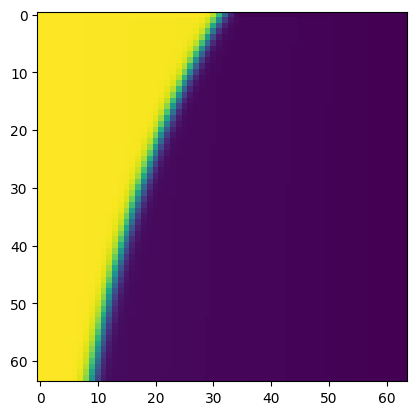

In [16]:
plt.imshow(ree)